In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
Frame = pd.DataFrame({
    "gradations":["grad1", "grad2", "grad3", "grad4", "grad5","grad6"],
    "gr1":[100,23,68,49,38,79],
    "gr2":[30,21,59,51,77,15]
})
Frame

,gradations,gr1,gr2
0,grad1,100,30
1,grad2,23,21
2,grad3,68,59
3,grad4,49,51
4,grad5,38,77
5,grad6,79,15


Text(0, 0.5, 'gr2')

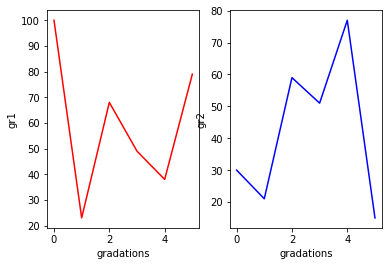

In [58]:
plt.subplot(1,2,1)
plt.plot(Frame["gr1"], color='r')
plt.xlabel("gradations")
plt.ylabel("gr1")

plt.subplot(1,2,2)
plt.plot(Frame["gr2"],color='b')
plt.xlabel("gradations")
plt.ylabel("gr2")


In [59]:
x=(Frame.iloc[:1])
print (x)
level=0.01
c = pd.read_excel("pirs.xlsx").iloc[Frame.shape[0]-1, 1 if(level == 0.01) else 2]
print("CA",c)

  gradations  gr1  gr2
0      grad1  100   30
CA 15.1


In [72]:
    def pirs(significance_lvl,Frame):
        empiricalVal=0
        if sum(Frame[Frame.keys()[1]]) == sum(Frame[Frame.keys()[2]]):
            for i in range((Frame.shape[0])):
                nij=((Frame[Frame.keys()[1]][i]-Frame[Frame.keys()[2]][i])**2)/Frame[Frame.keys()[2]][i]
                empiricalVal+=nij
        else:
            for i in range((Frame.shape[0])):
                Frame[Frame.keys()[1]][i] = (Frame[Frame.keys()[1]][i]/sum(Frame[Frame.keys()[1]])) * sum(Frame[Frame.keys()[2]])
                nij=((Frame[Frame.keys()[1]][i]-Frame[Frame.keys()[2]][i])**2)/Frame[Frame.keys()[2]][i]
                empiricalVal+=nij
        tableVal = pd.read_excel("pirs.xlsx").iloc[Frame.shape[0]-1, 1 if(significance_lvl == 0.01) else 2]
        print("Xemp^2=",empiricalVal,"\t","Xcritical^2=",tableVal)
        if(tableVal<empiricalVal):
            return ("Немає статичної розбіжності")
        else:
            return("Є Статична робіжність")
        

In [73]:
Frame["Percents for gr1"]=[Frame[Frame.keys()[1]][i]/sum(Frame[Frame.keys()[1]])*100 for i in range(Frame.shape[0])]
Frame["Percents for gr2"]=[Frame[Frame.keys()[2]][i]/sum(Frame[Frame.keys()[2]])*100 for i in range(Frame.shape[0])]

In [74]:
pirs(0.01,Frame)

Xemp^2= 230.1449634399214 	 Xcritical^2= 15.1


'Немає статичної розбіжності'